In [1]:
import cv2
import tensorflow as tf

2024-06-04 10:09:34.490192: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
model = tf.keras.models.load_model('../models/my_model_2024-06-04_09-06.h5')

2024-06-04 10:09:40.629018: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image using OpenCV
image = cv2.imread('./Images/test_image_7.png')
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
image = cv2.resize(image, (28, 28))  # Resize to match model's expected input size (example: MNIST 28x28)

# Normalize the image
image = image.astype('float32') / 255.0  # Normalize pixel values to [0, 1]

# Expand dimensions to create a batch of 1 image (required by the model)
image = np.expand_dims(image, axis=0)
print(image.shape)

(1, 28, 28)


1/1 [==============================] - 0s 26ms/step


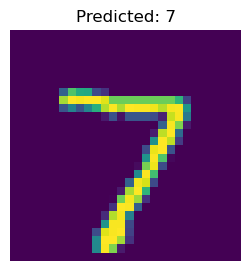

In [11]:
# Predict using the model
predictions = model.predict(image)

# Interpret the predictions (example: for MNIST, find the digit with highest probability)
predicted_class = np.argmax(predictions[0])

# Display the image
plt.figure(figsize=(3,3))  # Adjust the figure size as needed
plt.imshow(image[0])
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')  # Hide axis labels
plt.show()